In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  

from scipy import optimize as op
data = pd.read_csv('Autism-Adult-Data.arff',na_values="?")
plt.figure(figsize=(10,7))
#sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)#Plot rectangular data as a color-encoded matrix.
print(data.head())


   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age gender jundice austim  result Class/ASD  
0         1         0          0   26      f      no     no       6        NO  
1         1         0          1   24      m      no    yes       5        NO  
2         1         1          1   27      m     yes    yes       8       YES  
3         1         0          1   35      f      no    yes       6        NO  
4         1         0          0   40      f      no     no       2        NO  


<Figure size 720x504 with 0 Axes>

In [9]:
data.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.027570,0.397454
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.020492,0.392540
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.032066,0.552356
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.035297,0.586025
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,-0.025032,0.639706
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.036447,0.630012
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,-0.026935,0.454848
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,-0.076197,0.324020
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.055879,0.661205
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,-0.007632,0.537205


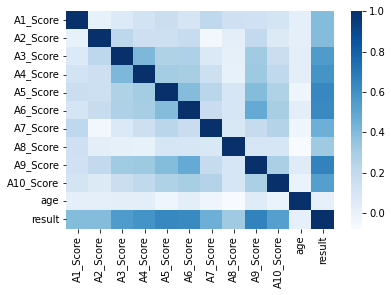

In [12]:
sns.heatmap(data.corr(),cmap='Blues')

In [ ]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
#print(missing_data.head())

data.rename(columns={'Class/ASD': 'decision_class'}, inplace=True)
data.jundice = data.jundice.apply(lambda x: 0 if x == 'no' else 1)
data.decision_class = data.decision_class.apply(lambda x: 0 if x == 'NO' else 1)
data.austim = data.austim.apply(lambda x: 0 if x == 'no' else 1)
le = LabelEncoder()
data.gender = le.fit_transform(data.gender) 
data.drop(['result'], axis=1, inplace=True)

print(data.isnull().sum())


X=data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'austim', 'gender',
       'jundice']]
print(X)
Y=data[['decision_class']]
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
#y_train=y_train.values.ravel()

In [ ]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#Regularized cost function
#Regularization is a concept by which machine learning algorithms can be prevented from overfitting a dataset
def regCostFunction(theta, X, y, _lambda = 0.1):
    m = y.size
    h = sigmoid(X.dot(theta))
    reg = (_lambda/(2 * m)) * np.sum(theta**2)

    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg

#Regularized gradient function
def regGradient(theta, X, y, _lambda = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = _lambda * theta /m

    return ((1 / m) * X.T.dot(h - y)) + reg

#Optimal theta 
def logisticRegression(X, y, theta):
    result = op.minimize(fun = regCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = regGradient)
    
    return result.x
    
Autism_Status = [1, 0]
#Number of examples
m = data.shape[0]
#Features
n = 13
#Number of classes
k = 2
#Training
print(Autism_Status)
all_theta = np.zeros((k, n + 1))

In [ ]:
#One vs all
i = 0
for Autism in Autism_Status:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train ==  Autism, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1
    
P = sigmoid(X_test.dot(all_theta.T)) #probability for each flower
p = [Autism_Status[np.argmax(P.values[i, :])] for i in range(X_test.shape[0])]

print("Test Accuracy ", accuracy_score(y_test, p) * 100 , '%')

print(classification_report(y_true=y_test,y_pred=p))

cfm = confusion_matrix(y_test, p, labels = Autism_Status)
sb.heatmap(cfm, annot = True, xticklabels = Autism_Status, yticklabels = Autism_Status);